In [7]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
import numpy as np

In [18]:
X, Y = make_blobs(cluster_std=1.5, random_state=20, n_samples=500, centers=3)
X = np.dot(X, np.random.RandomState(0).randn(2, 2))

GMM = GaussianMixture(n_components=3)
GMM.fit(X)
Y = np.random.randint(-10, 20, size=(1, 2))
print(GMM.means_, GMM.predict_proba(Y))

[[ 11.10531844  18.67490196]
 [-12.83538788   4.89646197]
 [ 19.88984357  17.46925321]] [[9.99988829e-01 1.96511896e-07 1.09740276e-05]]


In [19]:
print(GMM.covariances_)

[[[ 9.04458423  7.170253  ]
  [ 7.170253   12.87187739]]

 [[ 9.0583008   5.58186651]
  [ 5.58186651 10.07804916]]

 [[ 7.53503078  5.42685289]
  [ 5.42685289 11.14998135]]]


In [21]:
print(GMM.means_[0])
print(GMM.n_components)

[11.10531844 18.67490196]
3


In [9]:
%matplotlib inline

In [26]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# reg_cov is used for numerical stability i.e. to check singularity issues in covariance matrix 
reg_cov = 1e-6*np.identity(len(X[0]))

x,y = np.meshgrid(np.sort(X[:,0]), np.sort(X[:,1]))
XY = np.array([x.flatten(), y.flatten()]).T


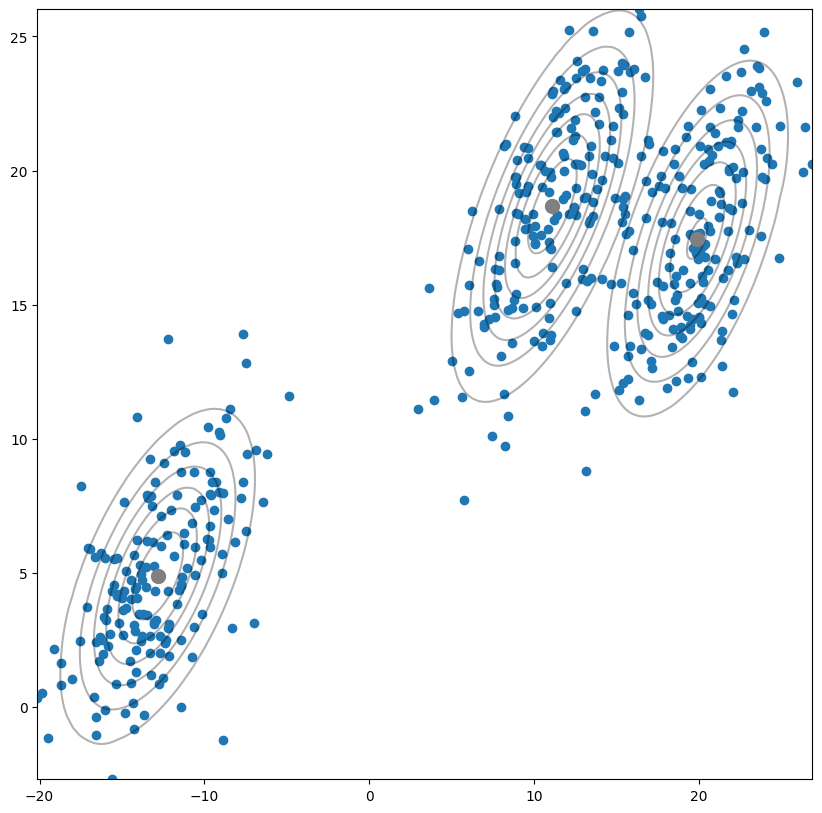

In [28]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:, 1])
for m, c in zip(GMM.means_, GMM.covariances_):
    c += reg_cov
    multi_normal = multivariate_normal(mean=m, cov=c)
    plt.contour(np.sort(X[:, 0]), np.sort(X[:, 1]), multi_normal.pdf(XY).reshape(len(X), len(X)), colors='black', alpha=0.3)
    plt.scatter(m[0], m[1], c='grey', zorder=10, s=100)
plt.show()